### **Data Storytelling Project: 10 Years of Renewable Energy Consumption in Colombia**

I will be performing some basic clean up to the data retrieve from here [World Energy Consumption](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption) and the metadata here [Our World in Data](https://ourworldindata.org/energy#introduction). The project is focused on data visualizations of a decade of evolution of Renewable Energy consumption in Colombia. 

In [59]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os

#### Loading Data

Loading the data and creating a new dataframe with the target country 'Colombia'.

In [60]:
# loading the data
df = pd.read_csv('../data/World Energy Consumption.csv')
df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# selecting the columns for comparison with region
countries = ['Argentina', 'Brazil', 'Colombia', 'Ecuador', 'Peru', 'Venezuela', 'Bolivia', 'Paraguay', 'Uruguay', 'Chile']
df_sa = df[df['country'].isin(countries)]

In [62]:
df_sa.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
680,ARG,Argentina,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.311303e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,ARG,Argentina,1901,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,2.404338e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,ARG,Argentina,1902,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,2.354418e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,ARG,Argentina,1903,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,2.693200e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,ARG,Argentina,1904,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,2.981703e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cleaning Data: South America Electricity Production 

In [63]:
# selecting years 
# selecting the columns we are interested in a separate df
df_sa_el = df_sa[['country','year', 
'population',
'gdp',     
'biofuel_electricity',
'coal_electricity',
'gas_electricity',
'hydro_electricity',
'nuclear_electricity',
'oil_electricity',
'other_renewable_electricity',
'other_renewable_exc_biofuel_electricity', 
'solar_electricity',
'wind_electricity']]
df_sa_el = df_sa_el[df_sa['year'] >= 2000]
# gdp_null = df_sa_el[['year','gdp']].isnull().any(axis=1)
# df_sa_el[gdp_null]

In [64]:
df_sa_el.isnull().sum()

country                                     0
year                                        0
population                                  7
gdp                                        37
biofuel_electricity                         0
coal_electricity                            0
gas_electricity                             0
hydro_electricity                           0
nuclear_electricity                         0
oil_electricity                             0
other_renewable_electricity                 0
other_renewable_exc_biofuel_electricity     0
solar_electricity                           0
wind_electricity                            0
dtype: int64

##### **Scraping World Bank Data**: GDP & Populations

In [65]:
import wbdata
import datetime

data_date = datetime.datetime(2000, 1, 1), datetime.datetime(2020, 1, 1)

# indicators parameter
indicators = {
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'SP.POP.TOTL': 'Population'
}
countries = ['COL', 'BRA', 'URY', 'ECU', 'PRY', 'ARG', 'CHL', 'PER', 'BOL', 'VEN']
# country selection
# countries = wbdata.get_country(country_id='SA')  # SA represents South America
# getting the data
sa_wb = wbdata.get_dataframe(indicators, country=countries, convert_date=False, data_date=data_date)
sa_wb

GDP (current US$)  Population
country       date                               
Argentina     2020       3.855402e+11  45376763.0
              2019       4.477546e+11  44938712.0
              2018       5.248197e+11  44494502.0
              2017       6.436287e+11  44044811.0
              2016       5.575314e+11  43590368.0
...                               ...         ...
Venezuela, RB 2004       1.124534e+11  26226927.0
              2003       8.362063e+10  25782029.0
              2002       9.289359e+10  25330929.0
              2001       1.229040e+11  24880203.0
              2000       1.171407e+11  24427729.0

[210 rows x 2 columns]

In [66]:
# renaming columns for merging
sa_wb = sa_wb.reset_index()
sa_wb.rename(columns={'GDP (US$ Billions)': 'gdp', 'date':'year', 'Population': 'population'}, inplace=True)

In [67]:
sa_wb['country'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Peru', 'Paraguay', 'Uruguay', 'Venezuela, RB'], dtype=object)

In [68]:
# checking the data
sa_wb.head()

,country,year,gdp,population
0,Argentina,2020,3.855402e+11,45376763.0
1,Argentina,2019,4.477546e+11,44938712.0
2,Argentina,2018,5.248197e+11,44494502.0
3,Argentina,2017,6.436287e+11,44044811.0
4,Argentina,2016,5.575314e+11,43590368.0


#### Replacing missing values in South America DataFrame with Scrapped World Bank Data

In [69]:
# dropping countries
countries_to_drop = ['Guyana', 'Suriname', 'French Guyana']
df_sa_el.drop(df_sa_el[df_sa_el['country'].isin(countries_to_drop)].index, inplace=True)

In [70]:
# sorting values
df_sa_el.sort_values(by=['country', 'year'])
df_sa_el.tail(20)

,country,year,population,gdp,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity
16668,Venezuela,2000,24192000.0,1.870000e+11,0.0,0.0,21.042,62.198,0.0,0.0,0.0,0.0,0.000,0.000
16669,Venezuela,2001,24646000.0,1.800000e+11,0.0,0.0,27.888,59.845,0.0,0.0,0.0,0.0,0.000,0.000
16670,Venezuela,2002,25100000.0,1.740000e+11,0.0,0.0,27.706,58.940,0.0,0.0,0.0,0.0,0.000,0.000
16671,Venezuela,2003,25552000.0,1.680000e+11,0.0,0.0,29.340,59.927,0.0,0.0,0.0,0.0,0.000,0.000
16672,Venezuela,2004,25997000.0,2.170000e+11,0.0,0.0,26.842,69.374,0.0,0.0,0.0,0.0,0.000,0.000
16673,Venezuela,2005,26432000.0,2.760000e+11,0.0,0.0,24.928,76.457,0.0,0.0,0.0,0.0,0.000,0.000
16674,Venezuela,2006,26850000.0,3.210000e+11,0.0,0.0,27.120,80.784,0.0,0.0,0.0,0.0,0.000,0.000
16675,Venezuela,2007,27248000.0,3.630000e+11,0.0,0.0,29.614,82.228,0.0,0.0,0.0,0.0,0.000,0.000
16676,Venezuela,2008,27636000.0,4.220000e+11,0.0,0.0,30.509,85.973,0.0,0.0,0.0,0.0,0.000,0.000
16677,Venezuela,2009,28031000.0,3.690000e+11,0.0,0.0,31.601,85.102,0.0,0.0,0.0,0.0,0.000,0.000


In [71]:
# Sorting values to replace
sa_wb.sort_values(by=['country', 'year'], inplace=True)
df_sa_el.sort_values(by=['country', 'year'], inplace=True)

In [72]:
# Verifying it is sorted properly
sa_wb.tail(5)

,country,year,gdp,population
193,"Venezuela, RB",2016,NaN,30741464.0
192,"Venezuela, RB",2017,NaN,30563433.0
191,"Venezuela, RB",2018,NaN,29825653.0
190,"Venezuela, RB",2019,NaN,28971683.0
189,"Venezuela, RB",2020,NaN,28490453.0


In [73]:
def replace_nan(df1, df2, column_names):
    """
    This function replaces NaN values in specific columns of the first dataframe
    with the values from the corresponding columns of the second dataframe.

    Parameters:
    df1 (pd.DataFrame): First DataFrame.
    df2 (pd.DataFrame): Second DataFrame from where to extract values to fill NaNs in df1.
    column_names (list): List of column names in which to replace NaN values.
    
    Returns:
    pd.DataFrame: A new dataframe with replaced NaN values.
    """
    # reset the index for both dataframes
    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    # 'year' and 'country' columns in both dataframes have the same data type for merging
    df1['year'] = df1['year'].astype(str)
    df2['year'] = df2['year'].astype(str)
    df1['country'] = df1['country'].astype(str)
    df2['country'] = df2['country'].astype(str)
    # creating a copy of df1 to avoid changing the original dataframe
    df1_copy = df1.copy()
    # merge the df1_copy and df2 on 'year' and 'country'
    df1_copy = pd.merge(df1_copy, df2[column_names + ['year', 'country']],  on=['year', 'country'], how='left', suffixes=('', '_y'))
    # replace NaNs in the specific columns in df1_copy with the corresponding values from df2
    for col in column_names:
        df1_copy[col].fillna(df1_copy[col + '_y'], inplace=True)
    # dropping the redundant columns
    df1_copy.drop(columns=[col + '_y' for col in column_names], inplace=True)
    return df1_copy

In [74]:
# replacing values in South America's dataframe
df2_sa = replace_nan(df_sa_el, sa_wb, column_names)

In [75]:
df2_sa.isnull().sum()

country                                    0
year                                       0
population                                 0
gdp                                        3
biofuel_electricity                        0
coal_electricity                           0
gas_electricity                            0
hydro_electricity                          0
nuclear_electricity                        0
oil_electricity                            0
other_renewable_electricity                0
other_renewable_exc_biofuel_electricity    0
solar_electricity                          0
wind_electricity                           0
dtype: int64

#### **Data Visualizations of Electricity Production in Colombia and South America**


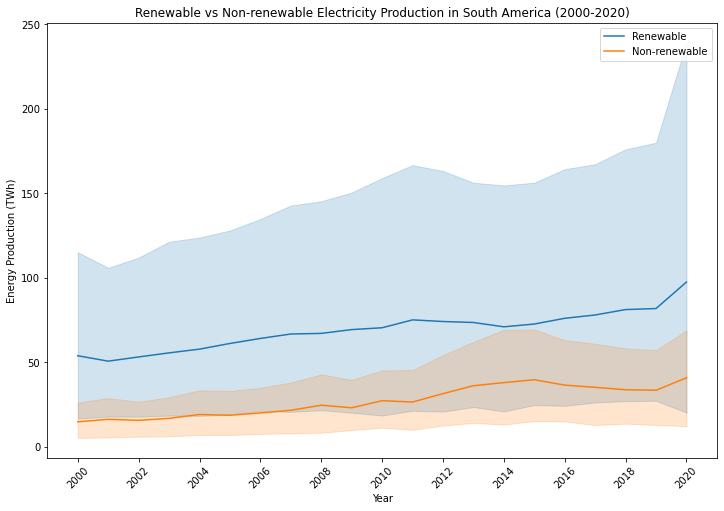

In [98]:
# Renewable energy types
renewable = ['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity']
# Non-renewable energy types
non_renewable = ['coal_electricity', 'gas_electricity', 'nuclear_electricity', 'oil_electricity']

# Total renewable and non-renewable energy production per year
df2_sa['total_renewable'] = df2_sa[renewable].sum(axis=1)
df2_sa['total_non_renewable'] = df2_sa[non_renewable].sum(axis=1)

# Convert the 'year' column to int
df2_sa['year'] = df2_sa['year'].astype(int)

# Plotting
plt.figure(figsize=(12,8))
sns.lineplot(data=df2_sa, x='year', y='total_renewable', label='Renewable')
sns.lineplot(data=df2_sa, x='year', y='total_non_renewable', label='Non-renewable')

# Modifying the x-axis
start_year = df2_sa['year'].min()
end_year = df2_sa['year'].max()
plt.xticks(np.arange(start_year, end_year + 1, 2), rotation=45)

plt.title('Renewable vs Non-renewable Electricity Production in South America (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Energy Production (TWh)')
plt.legend()
plt.savefig('renewable_nonren_sa.jpg', dpi=300)
plt.show()



#### **Correlation: Scatter Plot of GDP and Renewable Energy Production in South America:** 

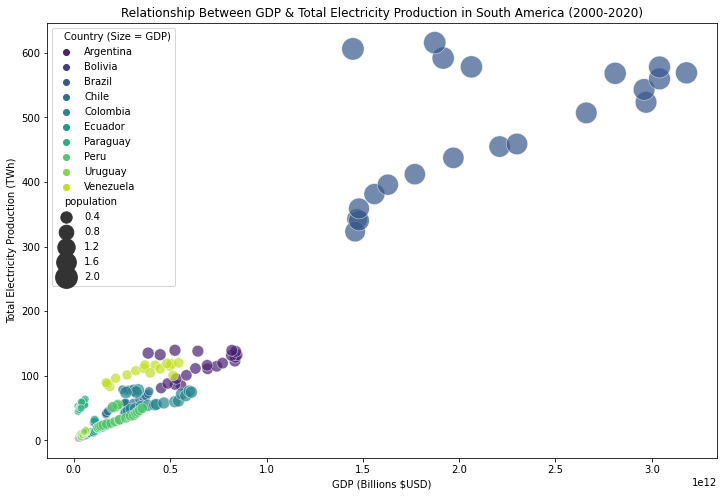

In [107]:
df2_sa['total_energy'] = df2_sa[renewable + non_renewable].sum(axis=1)
plt.figure(figsize=(12,8))
scatter = sns.scatterplot(x='gdp', y='total_energy', hue='country', size='population', 
                          sizes=(50, 500), data=df2_sa, palette='viridis', legend='brief', alpha=0.7)
# increase the size of the legend markers
scatter.legend_.legendHandles[0]._sizes = [30]
# modifying legend title
scatter.legend_.texts[0].set_text("Country (Size = GDP)")
# change label formats to scientific notation
scatter.get_xaxis().get_major_formatter().set_scientific(True)
scatter.get_yaxis().get_major_formatter().set_scientific(True)
plt.title('Relationship Between GDP & Total Electricity Production in South America (2000-2020)')
plt.xlabel('GDP (Billions $USD)')
plt.ylabel('Total Electricity Production (TWh)')
plt.savefig('gdp_vs_elec_scatterplot.jpg', dpi=300)
plt.show()


<Figure size 864x576 with 0 Axes>

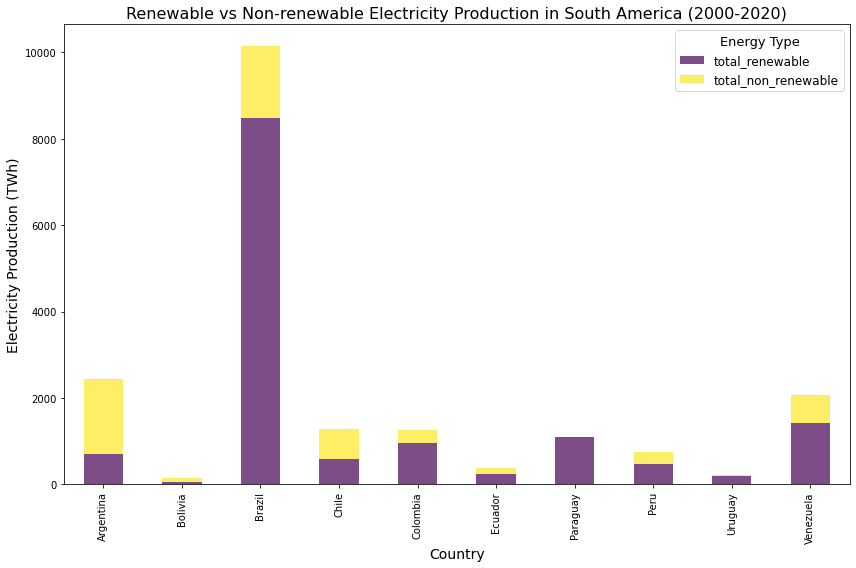

In [100]:
# group by country and sum up the renewable and non-renewable energy
grouped = df2_sa.groupby('country')[['total_renewable', 'total_non_renewable']].sum()
# Plotting
plt.figure(figsize=(12,8))
grouped.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.7, figsize=(12,8))
plt.title('Renewable vs Non-renewable Electricity Production in South America (2000-2020)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Electricity Production (TWh)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-labels to prevent overlap
plt.legend(title='Energy Type', title_fontsize='13', fontsize='12')
plt.tight_layout()  # Adjust layout for better appearance
plt.savefig('electricity_production_by_country_stacked.jpg', dpi=300)
plt.show()

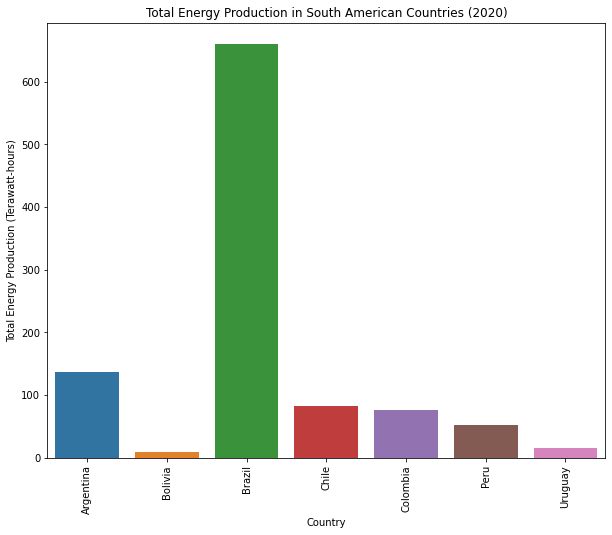

In [89]:
# Filter data for the latest year
df_latest_year = df2_sa[df2_sa['year'] == df2_sa['year'].max()]
plt.figure(figsize=(10,8))
sns.barplot(data=df_latest_year, x='country', y='total_energy')
plt.title('Total Energy Production in South American Countries (2020)')
plt.xlabel('Country')
plt.ylabel('Total Energy Production (Terawatt-hours)')
plt.xticks(rotation=90)
plt.show()


/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_91739/105552291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['total_renewable'] = df_col[renewable].sum(axis=1)
/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_91739/105552291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['total_non_renewable'] = df_col[non_renewable].sum(axis=1)


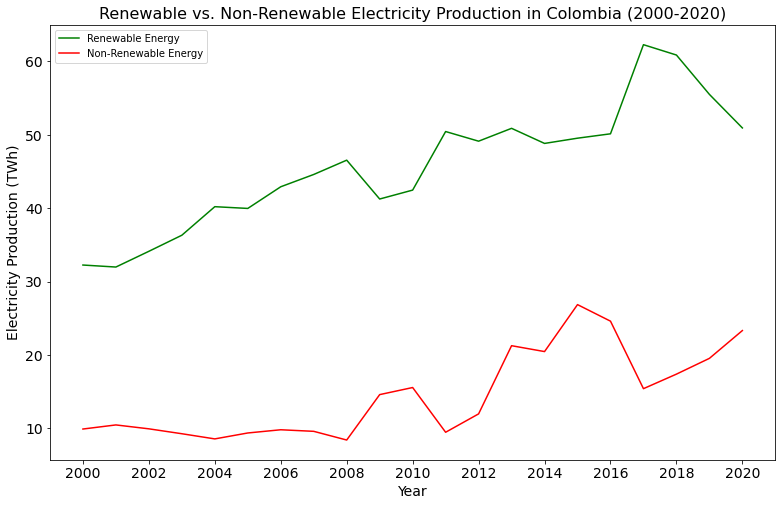

In [111]:
# Define renewable and non-renewable energy sources
renewable = ['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity']
non_renewable = ['coal_electricity', 'gas_electricity', 'nuclear_electricity', 'oil_electricity']
# Filter df2_sa for Colombia's data
df_col = df2_sa[df2_sa['country'] == 'Colombia']
# Calculate the total renewable and non-renewable energy for each year in Colombia
df_col['total_renewable'] = df_col[renewable].sum(axis=1)
df_col['total_non_renewable'] = df_col[non_renewable].sum(axis=1)
# Set the figure size
plt.figure(figsize=(13, 8))
# Create a line plot for renewable and non-renewable energy production over time
sns.lineplot(x='year', y='total_renewable', data=df_col, label='Renewable Energy', color='green')
sns.lineplot(x='year', y='total_non_renewable', data=df_col, label='Non-Renewable Energy', color='red')
# Set the title and labels, adjusting size for readability
plt.title('Renewable vs. Non-Renewable Electricity Production in Colombia (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Electricity Production (TWh)', fontsize=14)
# Adjusting the x-axis to show each second year
plt.xticks(np.arange(df_col['year'].min(), df_col['year'].max() + 1, 2), fontsize=14)
plt.yticks(fontsize=14)
# Display the legend
plt.legend()
# Save the plot as a high-resolution image
plt.savefig('energy_production_col.jpg', dpi=300, bbox_inches='tight')
plt.show()


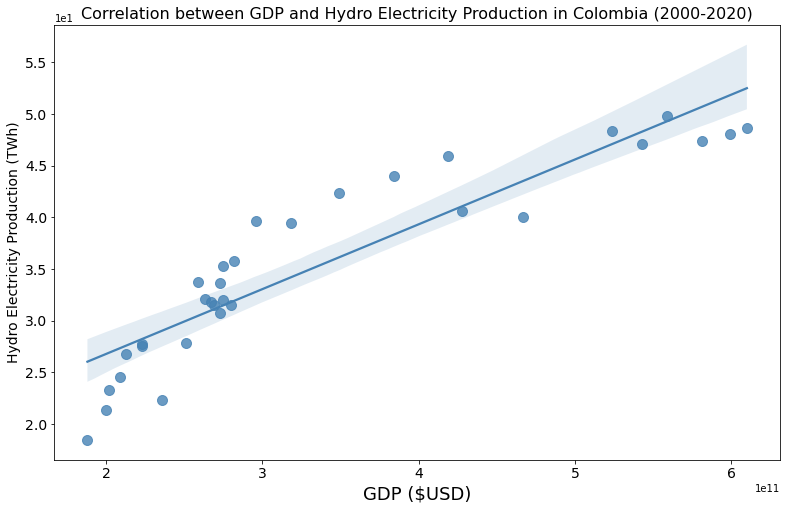

In [103]:
# filtering Colombia's data
df_col = df_sa[df_sa['country'] == 'Colombia']
# Set the figure size
plt.figure(figsize=(13, 8))
# creating a scatterplot and fit a regression line
sns.regplot(x='gdp', y='hydro_electricity', data=df_col, color='steelblue', scatter_kws={'s': 100})
# title and labels
plt.title('Correlation between GDP and Hydro Electricity Production in Colombia (2000-2020)', fontsize=16)
plt.xlabel('GDP ($USD)', fontsize=18)
plt.ylabel('Hydro Electricity Production (TWh)', fontsize=14)
# adjusting the format of the ticks to scientific notation
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# adjusting the size of the ticks for readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Save the plot as a high-resolution image
plt.savefig('gdp_hydro_col.jpg', dpi=300, bbox_inches='tight')
plt.show()


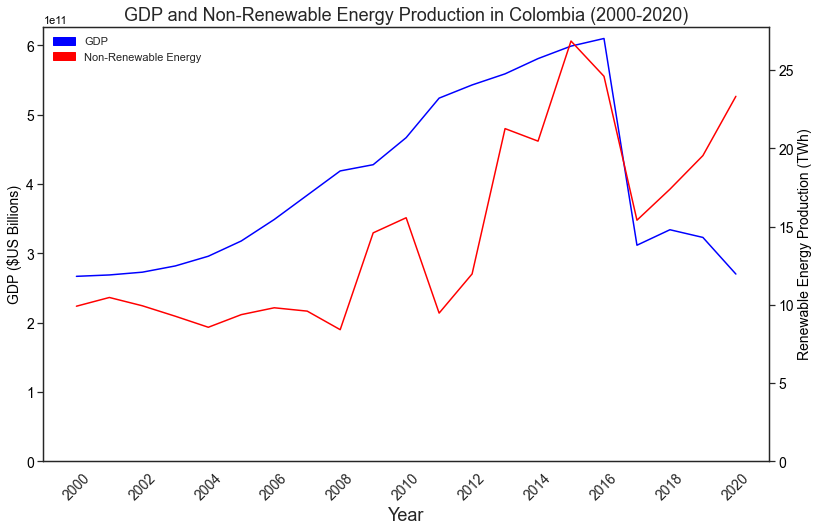

In [122]:
import matplotlib.patches as mpatches
# set theme of visualization
sns.set_style("white")
# filtering Colombia's data
df_col = df2_sa[df2_sa['country'] == 'Colombia']
fig, ax1 = plt.subplots(figsize=(13, 8))
# lineplot for GDP
sns.lineplot(x='year', y='gdp', data=df_col, ax=ax1, color='blue', legend=False)
# labels
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('GDP ($US Billions)', fontsize=14, color='black')  # Changing label color to black
ax1.set_title('GDP and Non-Renewable Energy Production in Colombia (2000-2020)', fontsize=18)
ax1.tick_params(axis='y', labelcolor='black')  # Changing tick color to black
# setting y-axis to start at 0
ax1.set_ylim(bottom=0)
# removing grid
ax1.grid(False)
# instantiating a second y-axis that shares the same x-axis
ax2 = ax1.twinx() 
# lineplot for energy
sns.lineplot(x='year', y='total_non_renewable', data=df_col, ax=ax2, color='red', legend=False)
# set the y-label for the second axis
ax2.set_ylabel('Renewable Energy Production (TWh)', fontsize=14, color='black')  # Changing label color to black
ax2.tick_params(axis='y', labelcolor='black')  # Changing tick color to black
# setting second y-axis to start at 0
ax2.set_ylim(bottom=0)
# remove grid from the second axis
ax2.grid(False)
# Adjusting the size of the ticks for readability
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
# adjusting the ticks on the x-axis to go 2 by 2 and to be integers
ax1.set_xticks(range(df_col['year'].min(), df_col['year'].max() + 1, 2))
ax1.set_xticklabels(range(df_col['year'].min(), df_col['year'].max() + 1, 2), rotation=45)
# manually adding a custom legend with color patches
blue_patch = mpatches.Patch(color='blue', label='GDP')
red_patch = mpatches.Patch(color='red', label='Non-Renewable Energy')
ax1.legend(handles=[blue_patch, red_patch], loc='upper left', frameon=False)
# save the plot as a high-resolution image
plt.savefig('gdp_nonren_col.jpg', dpi=300, bbox_inches='tight')
plt.show()


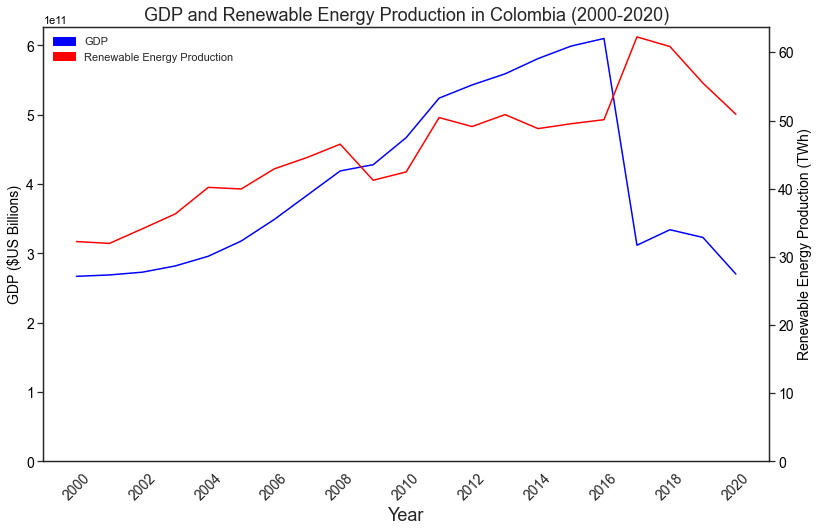

In [121]:
import matplotlib.patches as mpatches
# set theme of visualization
sns.set_style("white")
# filtering Colombia's data
df_col = df2_sa[df2_sa['country'] == 'Colombia']
fig, ax1 = plt.subplots(figsize=(13, 8))
# lineplot for GDP
sns.lineplot(x='year', y='gdp', data=df_col, ax=ax1, color='blue', legend=False)
# labels
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('GDP ($US Billions)', fontsize=14, color='black')  # Changing label color to black
ax1.set_title('GDP and Renewable Energy Production in Colombia (2000-2020)', fontsize=18)
ax1.tick_params(axis='y', labelcolor='black')  # Changing tick color to black
# setting y-axis to start at 0
ax1.set_ylim(bottom=0)
# removing grid
ax1.grid(False)
# instantiating a second y-axis that shares the same x-axis
ax2 = ax1.twinx() 
# lineplot for energy
sns.lineplot(x='year', y='total_renewable', data=df_col, ax=ax2, color='red', legend=False)
# set the y-label for the second axis
ax2.set_ylabel('Renewable Energy Production (TWh)', fontsize=14, color='black')  # Changing label color to black
ax2.tick_params(axis='y', labelcolor='black')  # Changing tick color to black
# setting second y-axis to start at 0
ax2.set_ylim(bottom=0)
# remove grid from the second axis
ax2.grid(False)
# Adjusting the size of the ticks for readability
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
# adjusting the ticks on the x-axis to go 2 by 2 and to be integers
ax1.set_xticks(range(df_col['year'].min(), df_col['year'].max() + 1, 2))
ax1.set_xticklabels(range(df_col['year'].min(), df_col['year'].max() + 1, 2), rotation=45)
# manually adding a custom legend with color patches
blue_patch = mpatches.Patch(color='blue', label='GDP')
red_patch = mpatches.Patch(color='red', label='Renewable Energy Production')
ax1.legend(handles=[blue_patch, red_patch], loc='upper left', frameon=False)
# save the plot as a high-resolution image
plt.savefig('gdp_ren_energy_col.jpg', dpi=300, bbox_inches='tight')
plt.show()

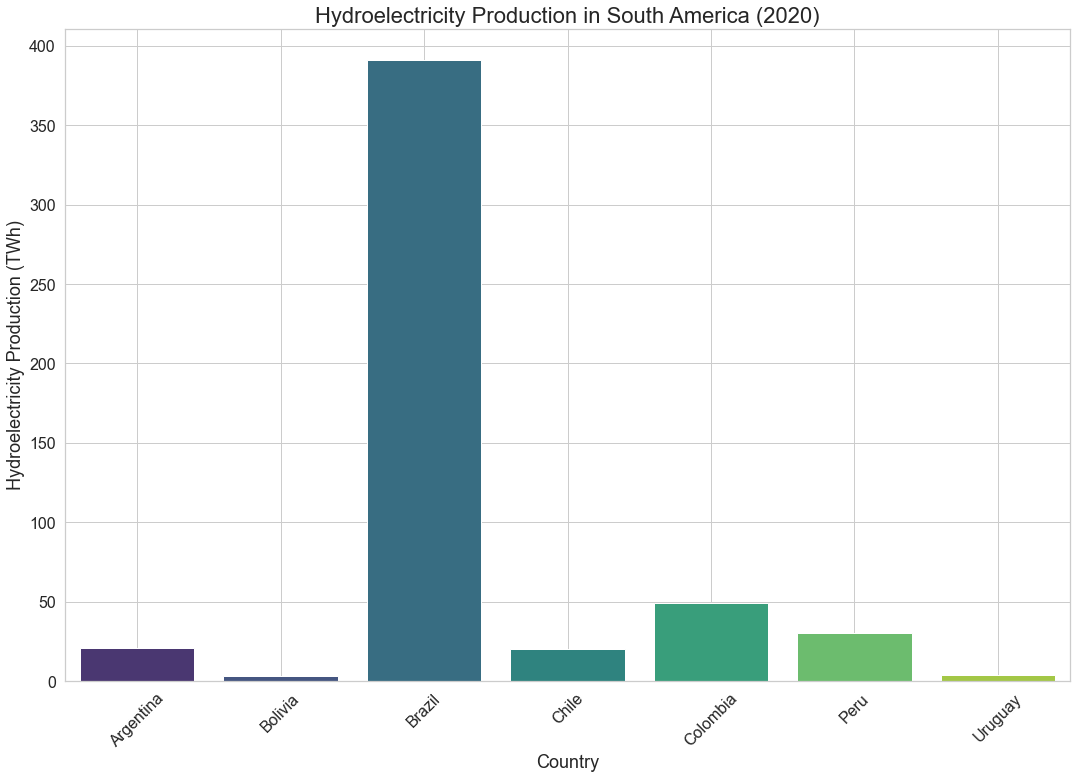

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style
sns.set_style('whitegrid')

# Filter the data for the year 2020
df_2020 = df2_sa[df2_sa['year'] == 2020]

plt.figure(figsize=(18, 12))

# Create a bar plot for each country
sns.barplot(x='country', y='hydro_electricity', data=df_2020, palette='viridis')

plt.title('Hydroelectricity Production in South America (2020)', fontsize=22)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Hydroelectricity Production (TWh)', fontsize=18)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# Add gridlines
plt.grid(True)
# Save the plot as a high-resolution image
plt.savefig('hydroelectricity_2020_sa.jpg', dpi=300, bbox_inches='tight')
plt.show()